<a href="https://colab.research.google.com/github/kap2fox/Intro-to-Robotics/blob/main/Lektorium_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                                  # модуль для поддержки многомерных массивов
import matplotlib.pyplot as plt                     # модуль для визуализации данных
from scipy.integrate import odeint                  # модуль для оптимизации функций
import math as m                                    # модуль для математических функций

In [ ]:
T_m = 0.08                                          # электромеханическая постоянная времени
k_e = 0.5                                           # конструктивная постоянная двигателя
n = 15001                                           # количество шагов моделирования
t = np.linspace(0,15,n)                             # задание пространства времени, массив n элементов значениями от 0 до 15 секунд
B = 0.15                                            # расстояние между колесами
r = 0.026                                           # радиус колеса

In [ ]:
def motor(state,t,u):
    speed, angle = state                            # обозначение состояния двигателя как скорости и угла поворота
    state_dt = [-speed/T_m + u/ (T_m * k_e), speed ]# задание производной состояния двигателя
    return state_dt

Для модели двухколесного робота с дифференциальным приводом или "differential drive robot" потребуется управляющее напряжение на каждый двигатель, а также массивы для пройденного пути, угла поворота робота и координат.

In [ ]:
state_l = [0 , 0]                                   # переменная состояния левого двигателя
state_r = [0 , 0]                                   # переменная состояния правого двигателя
control_l = np.zeros(n)                             # массив управляющего напряжение левого двигателя
control_r = np.zeros(n)                             # массив управляющего напряжение правого двигателя
theta_l = np.zeros(n)                               # массив углов поворота левого двигателя
theta_r = np.zeros(n)                               # массив углов поворота правого двигателя
x = np.zeros(n)                                     # массив X координат робота
y = np.zeros(n)                                     # массив Y координат робота
path = np.zeros(n)                                  # массив пройденного пути
psi = np.zeros(n)                                   # массив курсовых углов робота


Основной цикл, как и вслучае с ПИД-регулятором, будет включать в себя вычисление углов поворота двигателя и координат робота. Для расчета координат робота необходима следующая система уравнений, где $L$ - пройденный роботом, $\psi$ - курсовой угол робота:
$$
\left\{
    \begin{array}\\
        x = x + \Delta L \, \cos(\psi), \\
        y = y + \Delta L \, \sin(\psi), \\
        \psi = (\theta_r-\theta_l)\frac{r}{B}.
    \end{array} \tag{6}
\right.
$$
Для простого случая движения двухколесного робота можно подать разное напряжение на двигатели и увидеть круговую траекторию, начинающуюся в точке [0, 0].

[ 4.   59.68]


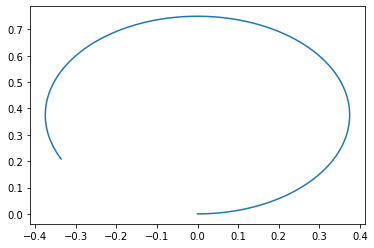

In [ ]:
for i in range(1,n):

    path[i] = (theta_r[i-1] + theta_l[i-1]) * r / 2                             # вычисление пройденного пути
    psi[i] = (theta_r[i-1] - theta_l[i-1]) * r / B                              # вычисление курсового угла
    x[i] = x[i-1] + (path[i]-path[i-1]) * m.cos(psi[i])                         # вычисление координаты X
    y[i] = y[i-1] + (path[i]-path[i-1]) * m.sin(psi[i])                         # вычисление координаты Y

    control_l [i] = 2                                                           # задание управляющего напряжения левого двигателя
    control_r [i] = 3                                                           # задание управляющего напряжение правого двигателя

    motor_l = odeint(motor, state_l,[t[i-1],t[i]],args=(control_l [i],))        # вычисление угла поворота левого двигателя
    state_l = motor_l[1,:]                                                      # запоминание состояния левого двигателя 
    theta_l[i] = motor_l[1,1]                                                   # сохранение угла поворота левого двигателя
    motor_r = odeint(motor, state_r,[t[i-1],t[i]],args=(control_r [i],))        # вычисление угла поворота правого двигателя
    state_r = motor_r[1,:]                                                      # запоминание состояния правого двигателя 
    theta_r[i] = motor_r[1,1]                                                   # сохранение угла поворота правого двигателя

plt.plot(x, y)                                                                  # отрисовка результатов